# PN2V Prediction
Please run the `2_ProbabilisticNoise2VoidTraining.ipynb` notebook first.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import torch
from tifffile import imread
import sys
sys.path.append('../../../')
from unet.model import UNet
from pn2v.utils import denormalize
from pn2v.utils import normalize
from pn2v.utils import PSNR
from pn2v import utils
from pn2v import prediction
import pn2v.training
from pn2v import histNoiseModel
from pn2v import gaussianMixtureNoiseModel

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
# We need the training data in order to calulate 'mean' and 'std' for normalization
path='../../../data/Mouse skull nuclei/'

# Load the test data
dataTest=imread(path+"example2_digital_offset300.tif")[:,:,:256] 
# We are loading only a sub image to speed up computation

# We estimate the ground truth by averaging.
dataTestGT=np.mean(dataTest[:,...],axis=0)[np.newaxis,...]



### Load the correct `namePN2VModel` and `dataName`

In [3]:
dataName = 'mouseskullnuclei'# Use the same name as used in 2_ProbabilisticNoise2VoidTraining.ipynb. This is a part of model name created in ProbabilisticNoise2VoidTraining.ipynb
# Load the noiseModel of interest 
nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'calibration'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'calibration'
#nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'bootstrap'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'bootstrap'


In [4]:
namePN2VModel=nameNoiseModel
net=torch.load(path+"/last_"+namePN2VModel+".net")
if('HistNoiseModel' in namePN2VModel):
    histogram = np.load(path+nameNoiseModel+'.npy') 
    noiseModel= histNoiseModel.NoiseModel(histogram, device=device)
elif('GMMNoiseModel' in namePN2VModel):
    params= np.load(path+nameNoiseModel+'.npz')
    noiseModel = gaussianMixtureNoiseModel.GaussianMixtureNoiseModel(params = params, device = device)    

### Evaluation

image: 0
PSNR input 28.02423798473431
PSNR prior 35.52977153017055
PSNR mse 36.102491681101306
-----------------------------------
image: 1
PSNR input 28.065531602490644
PSNR prior 35.610092800300116
PSNR mse 36.208222903694036
-----------------------------------
image: 2
PSNR input 28.035021421910734
PSNR prior 35.5954418499723
PSNR mse 36.193406053151946
-----------------------------------
image: 3
PSNR input 28.087744381628678
PSNR prior 35.644854316475936
PSNR mse 36.24247117521172
-----------------------------------
image: 4
PSNR input 28.061745249613562
PSNR prior 35.523276908681396
PSNR mse 36.10898118499935
-----------------------------------
image: 5
PSNR input 28.1086316653067
PSNR prior 35.65715796368481
PSNR mse 36.27680326288577
-----------------------------------
image: 6
PSNR input 28.11584919615069
PSNR prior 35.70260512744447
PSNR mse 36.317234520422495
-----------------------------------
image: 7
PSNR input 28.078571033189487
PSNR prior 35.61098469073938
PSNR mse 36.2

image: 63
PSNR input 28.12501501087707
PSNR prior 35.74193921566107
PSNR mse 36.38822281582723
-----------------------------------
image: 64
PSNR input 28.07112598033649
PSNR prior 35.66931407486962
PSNR mse 36.291581575830946
-----------------------------------
image: 65
PSNR input 28.096510397485332
PSNR prior 35.658517516081474
PSNR mse 36.25609755526734
-----------------------------------
image: 66
PSNR input 28.129393849352013
PSNR prior 35.69498050816204
PSNR mse 36.31255803130071
-----------------------------------
image: 67
PSNR input 28.11863774042713
PSNR prior 35.648037447677595
PSNR mse 36.27578097804483
-----------------------------------
image: 68
PSNR input 28.0744924081312
PSNR prior 35.629302918484626
PSNR mse 36.230030534976166
-----------------------------------
image: 69
PSNR input 28.087115550087496
PSNR prior 35.66184074085854
PSNR mse 36.299869620005744
-----------------------------------
image: 70
PSNR input 28.100664171847036
PSNR prior 35.65762173105951
PSNR m

image: 125
PSNR input 28.072423743733374
PSNR prior 35.59705204188059
PSNR mse 36.20768515475486
-----------------------------------
image: 126
PSNR input 28.10362116835521
PSNR prior 35.6239966957311
PSNR mse 36.24299912528143
-----------------------------------
image: 127
PSNR input 28.0866054971337
PSNR prior 35.62035944063731
PSNR mse 36.20991743278667
-----------------------------------
image: 128
PSNR input 28.074943517260927
PSNR prior 35.7010135606792
PSNR mse 36.30408609739502
-----------------------------------
image: 129
PSNR input 28.11689860560632
PSNR prior 35.631832154964904
PSNR mse 36.24443241010577
-----------------------------------
image: 130
PSNR input 28.080942114379344
PSNR prior 35.582633766925376
PSNR mse 36.19657858617356
-----------------------------------
image: 131
PSNR input 28.079838325466856
PSNR prior 35.596748164871464
PSNR mse 36.21199173961675
-----------------------------------
image: 132
PSNR input 28.115379662314908
PSNR prior 35.65371557659215
PS

image: 187
PSNR input 28.12713881880164
PSNR prior 35.6026324778024
PSNR mse 36.21742332135825
-----------------------------------
image: 188
PSNR input 28.13034668273638
PSNR prior 35.61923201057855
PSNR mse 36.21801386632743
-----------------------------------
image: 189
PSNR input 28.10561031416221
PSNR prior 35.61900313966835
PSNR mse 36.239647193222446
-----------------------------------
image: 190
PSNR input 28.111479741803066
PSNR prior 35.568266601725625
PSNR mse 36.16216582832428
-----------------------------------
image: 191
PSNR input 28.07092498764707
PSNR prior 35.60608267153561
PSNR mse 36.22673758428201
-----------------------------------
image: 192
PSNR input 28.166413092352876
PSNR prior 35.68650185505628
PSNR mse 36.31920010868988
-----------------------------------
image: 193
PSNR input 28.087727009670633
PSNR prior 35.52896315395334
PSNR mse 36.14214152591966
-----------------------------------
image: 194
PSNR input 28.11679210976056
PSNR prior 35.6147683333739
PSNR

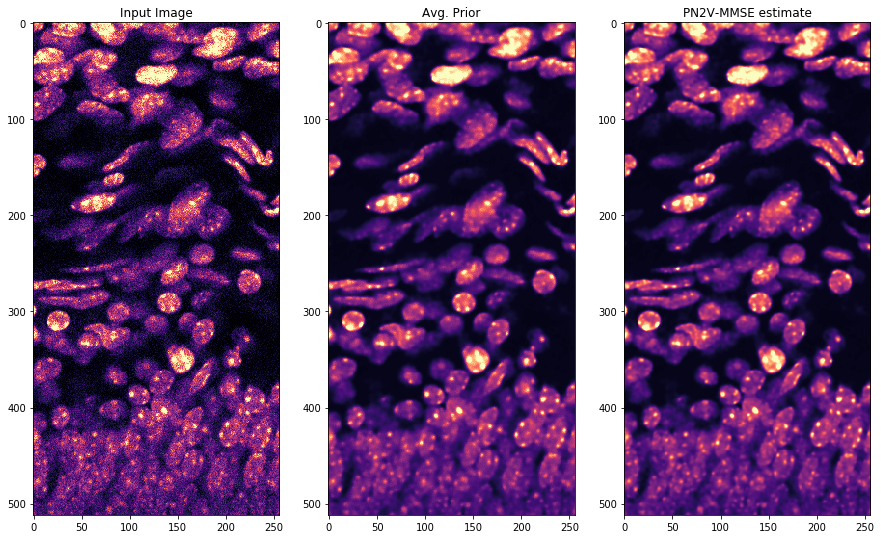

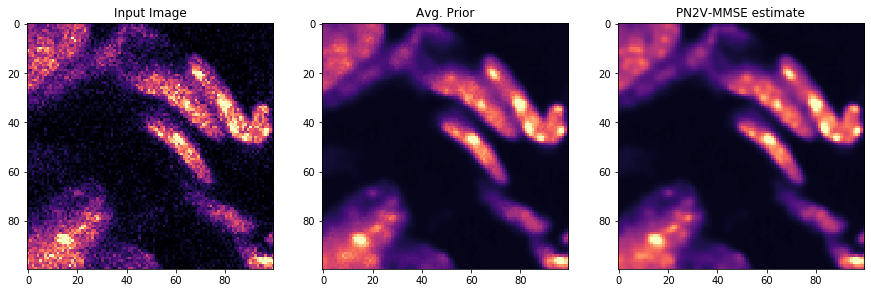

Avg PSNR Prior: 35.65731985145369 +-(2SEM) 0.008521420610093361
Avg PSNR MMSE: 36.277773385896054 +-(2SEM) 0.010071079421430717


In [5]:
# Now we are processing data and calculating PSNR values.
results=[]
meanRes=[]
resultImgs=[]
inputImgs=[]

# We iterate over all test images.
for index in range(dataTest.shape[0]):
    
    im=dataTest[index]
    gt=dataTestGT[0] # The ground truth is the same for all images
    
    # We are using tiling to fit the image into memory
    # If you get an error try a smaller patch size (ps)
    means, mseEst = prediction.tiledPredict(im, net, ps=128, overlap=48,
                                             device=device, noiseModel=noiseModel)

    
    resultImgs.append(mseEst)
    inputImgs.append(im)

    rangePSNR=np.max(gt)-np.min(gt)
    psnr=PSNR(gt, mseEst,rangePSNR )
    psnrPrior=PSNR(gt, means,rangePSNR )
    results.append(psnr)
    meanRes.append(psnrPrior)

    print ("image:",index)
    print ("PSNR input",PSNR(gt, im, rangePSNR))
    print ("PSNR prior",psnrPrior) # Without info from masked pixel
    print ("PSNR mse",psnr) # MMSE estimate using the masked pixel
    print ('-----------------------------------')

    
    
    
# We display the results for the last test image       
vmi=np.percentile(gt,0.01)
vma=np.percentile(gt,99)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 3)
plt.title(label='PN2V-MMSE estimate')
plt.imshow(mseEst, vmax=vma, vmin=vmi, cmap='magma')
plt.show()

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 3)
plt.title(label='PN2V-MMSE estimate')
plt.imshow(mseEst[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')
plt.show()

print("Avg PSNR Prior:", np.mean(np.array(meanRes) ), '+-(2SEM)',2*np.std(np.array(meanRes) )/np.sqrt(float(len(meanRes)) ) )
print("Avg PSNR MMSE:", np.mean(np.array(results) ),  '+-(2SEM)' ,2*np.std(np.array(results) )/np.sqrt(float(len(results)) ) )